In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step =50

In [3]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
pred = tf.add(tf.multiply(X,W),b)

In [6]:
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

Epoch: 0050 cost: 0.077050649 W: 0.245499 b: 0.830926
Epoch: 0100 cost: 0.077044077 W: 0.245742 b: 0.829174
Epoch: 0150 cost: 0.077038251 W: 0.245971 b: 0.827526
Epoch: 0200 cost: 0.077033058 W: 0.246187 b: 0.825975
Epoch: 0250 cost: 0.077028453 W: 0.24639 b: 0.824516
Epoch: 0300 cost: 0.077024378 W: 0.24658 b: 0.823145
Epoch: 0350 cost: 0.077020742 W: 0.246759 b: 0.821856
Epoch: 0400 cost: 0.077017523 W: 0.246928 b: 0.820643
Epoch: 0450 cost: 0.077014662 W: 0.247087 b: 0.819501
Epoch: 0500 cost: 0.077012122 W: 0.247236 b: 0.818427
Epoch: 0550 cost: 0.077009834 W: 0.247376 b: 0.817417
Epoch: 0600 cost: 0.077007830 W: 0.247508 b: 0.816469
Epoch: 0650 cost: 0.077006035 W: 0.247632 b: 0.815576
Epoch: 0700 cost: 0.077004433 W: 0.247749 b: 0.814737
Epoch: 0750 cost: 0.077002987 W: 0.247859 b: 0.813947
Epoch: 0800 cost: 0.077001736 W: 0.247962 b: 0.813203
Epoch: 0850 cost: 0.077000588 W: 0.248059 b: 0.812504
Epoch: 0900 cost: 0.076999605 W: 0.248151 b: 0.811845
Epoch: 0950 cost: 0.076998696 

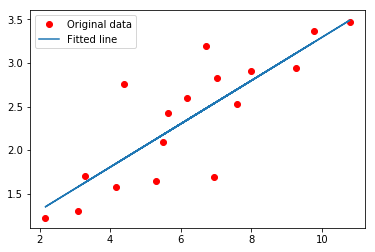

In [11]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        if (epoch+1)%display_step == 0:
            c = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print('Epoch:','%04d'%(epoch+1),'cost:','{:.9f}'.format(c),'W:',sess.run(W),'b:',sess.run(b))
    print('Optimization finished!')
    training_cost = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print('Training cost:','{:.9f}'.format(training_cost),'W:',sess.run(W),'b:',sess.run(b))
    
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='Fitted line')
    plt.legend()
    plt.show()